In [78]:
import pandas as pd
import networkx as nx
from scipy import stats
from matplotlib import pyplot as plt
pd.set_option('display.max_columns', 100)
%matplotlib inline

In [94]:
df = pd.read_excel('SignEpiPairs.xlsx')
df=df[df.pBon<0.05]

### 1. Dimensions

In [235]:
graph = df[df.SegN==12]
graph = graph.reset_index(drop=True)

In [245]:
H = nx.Graph()

for i in range(len(graph)):
    node1 = str(graph['VarPos'].ix[i]) + str(graph['Perm'].ix[i])
    node2 = str(graph['SubPos'].ix[i]) + str(graph['SubPerm'].ix[i]) 
    if node1 not in H.nodes():
        H.add_node(node1)
    if node2 not in H.nodes():
        H.add_node(node2)
    H.add_edge(node1, node2, {'color':'gray','thickness':2})

In [237]:
max(nx.greedy_color(H).values())+1

4

***

s1 -- 5

s2 -- 5

s3 -- 5

s4 -- 3

s5 -- 7

s6 -- 5

s8 -- 4

s9 -- 2

s11 -- 4

s12 -- 4

***

In [238]:
x = [5,5,5,3,7,5,3,2,4,4]
y = [len(df[df.SegN==i]) for i in [1,2,3,4,5,6,8,9,11,12]]

In [239]:
_,_,R,_,_=stats.linregress(x,y)
R

0.6279271738085509

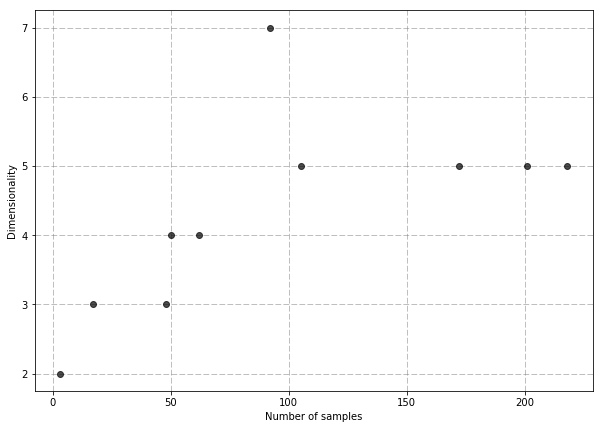

In [240]:
plt.figure(figsize=[10,7])
plt.plot(y,x,'ok', alpha = 0.7)
plt.xlabel('Number of samples')
plt.ylabel('Dimensionality')
plt.grid(True, ls='--', lw=0.5, dash_capstyle = 'round', c='gray');

### 2. Graphs visualization

In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [10]:
%run '../NN/scripts/Functions.ipynb'
import networkx as nx

In [71]:
df = pd.read_excel('SignEpiPairs.xlsx')
df = df[df.pBon<0.05]
graph = df[df.SegN==2]
graph = graph.reset_index(drop=True)

In [72]:
nodes = {}

for i in set(graph['VarPos']):
    nodes[i] = []
for i in set(graph['SubPos']):
    nodes[i] = []

for i in range(len(graph)):
    node1 = str(graph['VarPos'].ix[i]) + str(graph['Perm'].ix[i])
    node2 = str(graph['SubPos'].ix[i]) + str(graph['SubPerm'].ix[i])
    if node1 not in nodes[graph['VarPos'].ix[i]]:
        nodes[graph['VarPos'].ix[i]].append(node1)
    if node2 not in nodes[graph['SubPos'].ix[i]]:
        nodes[graph['SubPos'].ix[i]].append(node2)

In [73]:
H = nx.Graph()
H.size = {}
H.color = {}
H.width = {}
edges = []

for i in range(len(graph)):
    node1 = str(graph['VarPos'].ix[i]) + str(graph['Perm'].ix[i])
    node2 = str(graph['SubPos'].ix[i]) + str(graph['SubPerm'].ix[i])
    edges.append([node1, node2])
    
    
for key in nodes:
    for node in nodes[key]:
        H.add_node(node)
        H.size[node]=10000
        H.color[node]='gray'
        
edges = sorted(edges)

for edge in edges:
    if [edge[1],edge[0]] in edges:
        H.add_edge(edge[0], edge[1], {'color':'#00AEEF', 'thickness':5})
    else:
        H.add_edge(edge[0], edge[1], {'color':'gray', 'thickness':2})
        
color=[attribs['color'] for (v_from,v_to,attribs) in H.edges(data=True)]
thickness=[attribs['thickness'] for (v_from,v_to,attribs) in H.edges(data=True)]

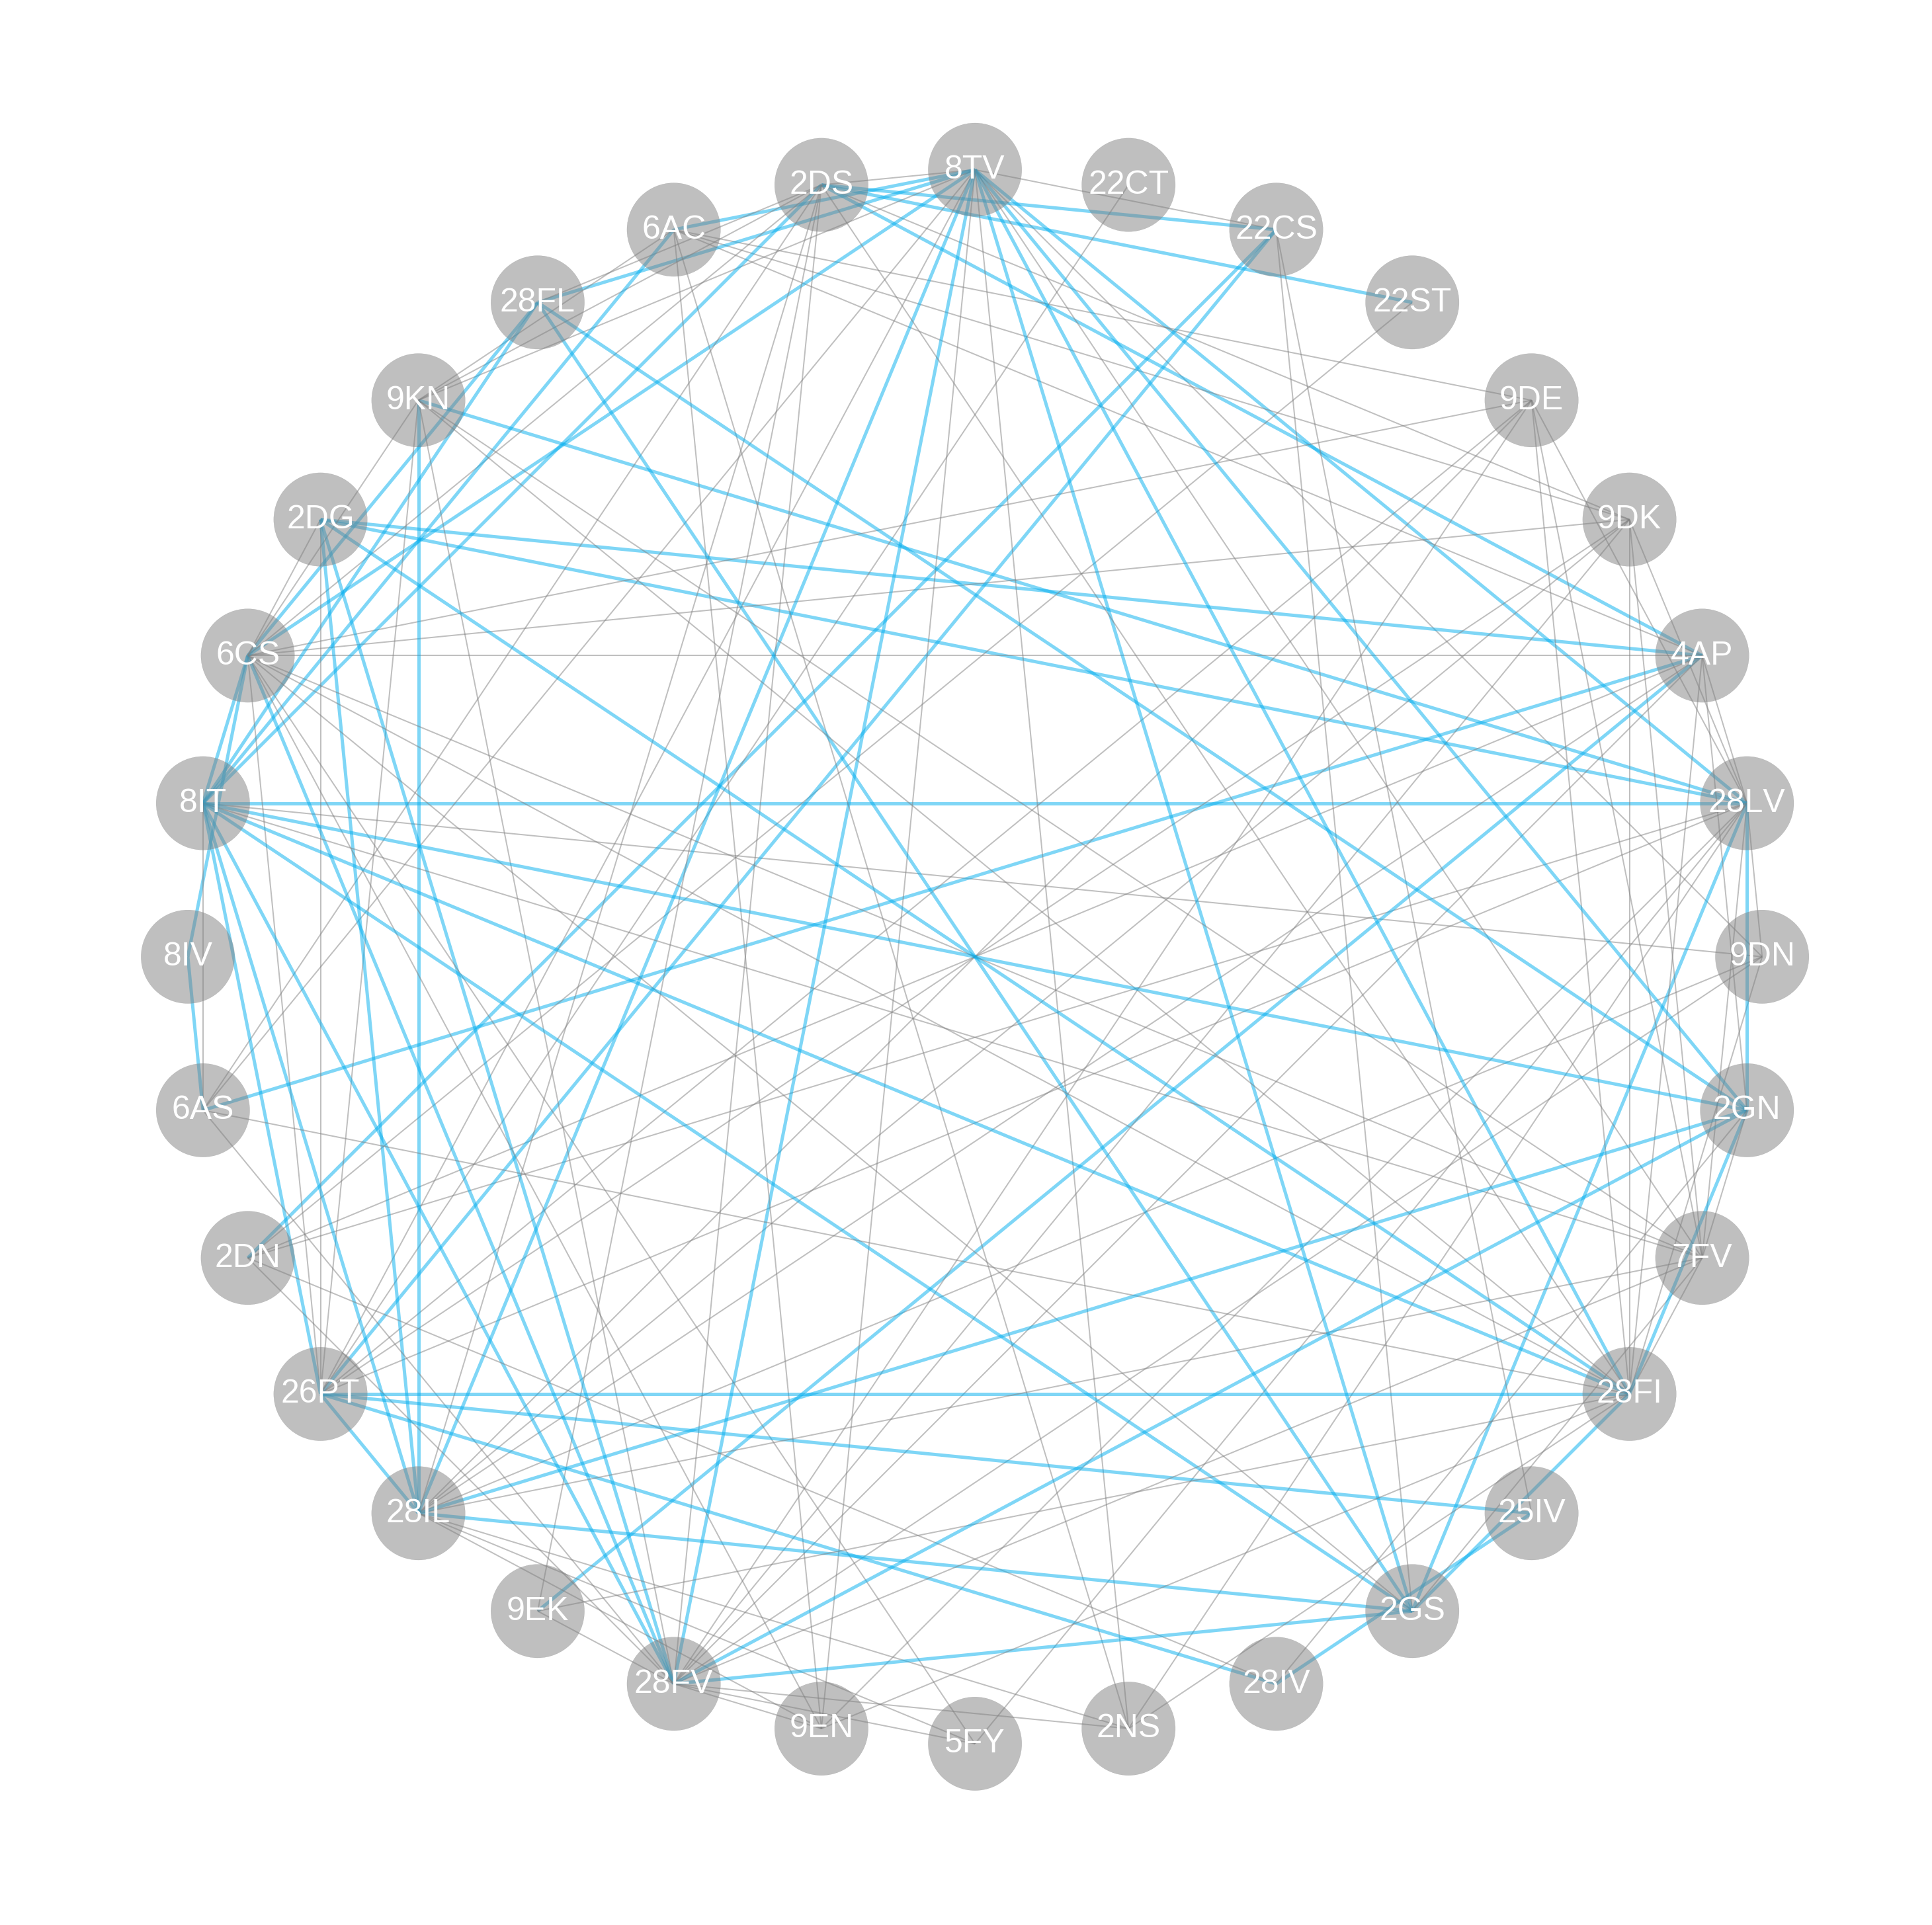

In [74]:
plt.figure(figsize=[40,40])
nx.draw_circular(H, with_labels=True,
                 node_size=20000, alpha=0.5, node_color=[H.color[v] for v in H],
                 font_size=50, font_color='white',edge_color=color,width=thickness)

In [75]:
nodeList = [x for x in H.nodes()]

In [77]:
nodesDF = pd.DataFrame(columns = ['id','label'])
nodesDF['id']=nodeList
nodesDF['label']=nodeList
nodesDF['position']=[int(x[:-2]) for x in nodeList]
nodesDF.sort(['position'],inplace=True)
nodesDF.to_csv('/home/katya/start/s2Nodes.csv')

/home/katya/anaconda3/envs/python2/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


In [78]:
edgesDF = pd.DataFrame(columns=['source','target'], index=[x for x in range(len(edges))])

In [79]:
edgeGroups = []
for edge in edges:
    if [edge[1],edge[0]] in edges:
        edgeGroups.append(1)
    else:
        edgeGroups.append(0)

In [80]:
edgesDF['source']=[x[0] for x in edges]
edgesDF['target']=[x[1] for x in edges]
edgesDF['group']=edgeGroups

In [81]:
edgesDF.to_csv('/home/katya/start/s2Edges.csv')